<a href="https://colab.research.google.com/github/RameshwarSanap/ML-Practicals/blob/main/Practical-03-Unsupervised-Learning/Practical_No_03_Unsupervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score


In [2]:
iris = load_iris()
X = iris.data
y = iris.target

df = pd.DataFrame(X, columns=iris.feature_names)
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
kmeans_3 = KMeans(n_clusters=3, random_state=42)
kmeans_3.fit(X)
print("Squared Error (k=3):", kmeans_3.inertia_)

kmeans_4 = KMeans(n_clusters=4, random_state=42)
kmeans_4.fit(X)
print("Squared Error (k=4):", kmeans_4.inertia_)


Squared Error (k=3): 78.85566582597727
Squared Error (k=4): 57.350880212954756


In [5]:
errors = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    errors.append(kmeans.inertia_)


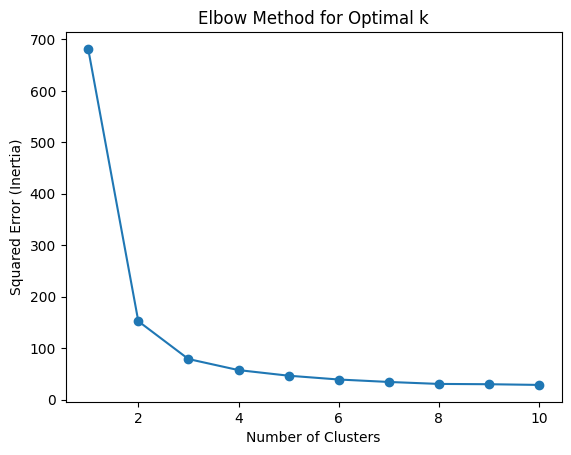

In [6]:
plt.plot(range(1,11), errors, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Squared Error (Inertia)")
plt.title("Elbow Method for Optimal k")
plt.show()


In [7]:
hier_errors = []

for k in range(2, 11):
    model = AgglomerativeClustering(n_clusters=k)
    labels = model.fit_predict(X)

    # Compute squared error manually
    error = 0
    for cluster in range(k):
        cluster_points = X[labels == cluster]
        center = np.mean(cluster_points, axis=0)
        error += np.sum((cluster_points - center) ** 2)

    hier_errors.append(error)

hier_errors


[np.float64(154.947),
 np.float64(79.29712847222223),
 np.float64(58.820924651372025),
 np.float64(47.07078576248314),
 np.float64(39.743792330627635),
 np.float64(35.62701353581451),
 np.float64(31.667887661688635),
 np.float64(29.559188386326316),
 np.float64(27.71838209829386)]

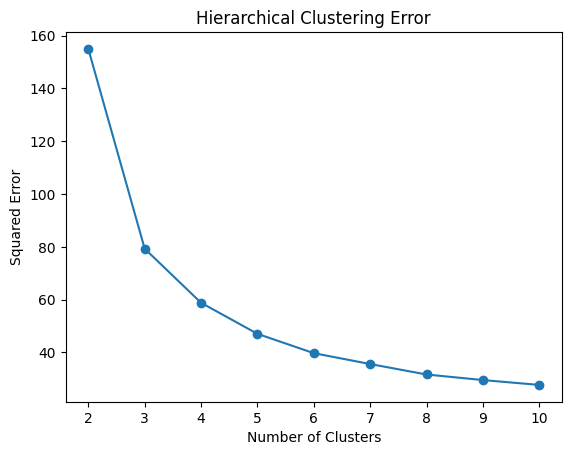

In [8]:
plt.plot(range(2,11), hier_errors, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Squared Error")
plt.title("Hierarchical Clustering Error")
plt.show()


In [11]:
print("K-Means gives lower error and clear optimal clusters.")
print("Hierarchical clustering is computationally expensive.")
print("Optimal number of clusters in both methods is approximately 3.")


K-Means gives lower error and clear optimal clusters.
Hierarchical clustering is computationally expensive.
Optimal number of clusters in both methods is approximately 3.


In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

print("Original Shape:", X.shape)
print("Reduced Shape:", X_pca.shape)


Original Shape: (150, 4)
Reduced Shape: (150, 2)


In [13]:
print("Explained Variance Ratio:")
print(pca.explained_variance_ratio_)

print("Total Variance Explained:",
      sum(pca.explained_variance_ratio_))


Explained Variance Ratio:
[0.92461872 0.05306648]
Total Variance Explained: 0.9776852063187977


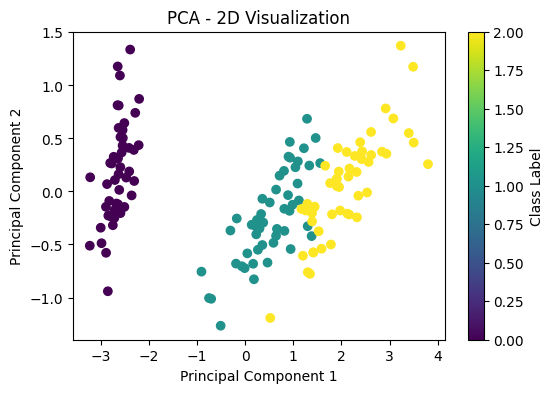

In [14]:
plt.figure(figsize=(6,4))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='viridis')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA - 2D Visualization")
plt.colorbar(label="Class Label")
plt.show()


In [ ]:
## Result

- K-Means and Hierarchical clustering algorithms were successfully implemented.
- Squared error was calculated for different numbers of clusters.
- The optimal number of clusters was found to be 3.
- PCA reduced the dataset from 4 dimensions to 2 dimensions.
- The first two principal components explained most of the variance in the data.
